<a href="https://colab.research.google.com/github/caiomarcelo03/caiomarcelo03-BI_DATAMINING_REGRESSAO/blob/main/Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

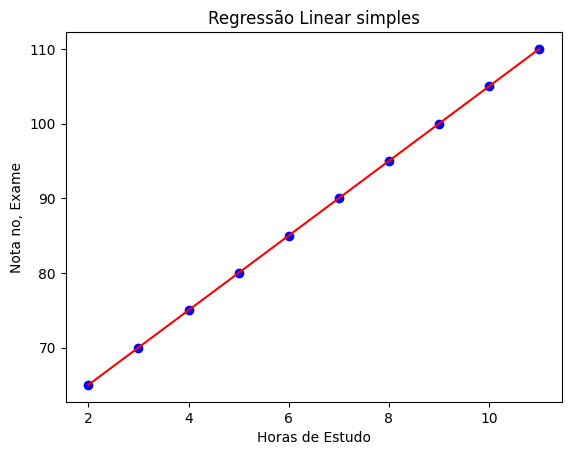

Nota prevista para 8 horas de estudo: 95.00


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Dados de horas de estudo e notas no exame

horas_estudo = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
notas_exame = np.array([65, 70, 75, 80, 85, 90, 95, 100, 105, 110])

#Criar um modelo de regressão linear modelo LinearRegression()
modelo = LinearRegression()

#Treinar o modelo
modelo.fit(horas_estudo, notas_exame)

#coeficientes do modelo

coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_

#Plotar os dados e a reta de regressão

plt.scatter(horas_estudo, notas_exame, color="blue")
plt.plot(horas_estudo, modelo.predict(horas_estudo), color='red')
plt.title('Regressão Linear simples')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota no, Exame')
plt.show()

#Fazer previsões com a modelo

horas_estudo_novo = np.array([[8]]) # Horas de estudo do novo aluna

nota_prevista = modelo.predict(horas_estudo_novo)

print("Nota prevista para {} horas de estudo: {:.2f}".format(horas_estudo_novo[0][0], nota_prevista[0]))

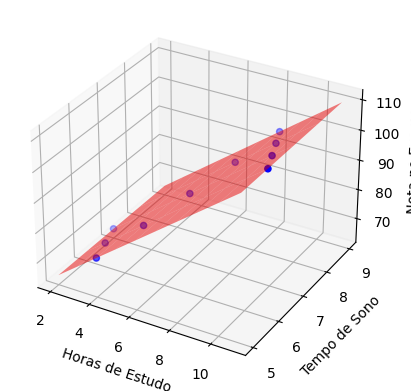

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

#Dados de horas de estudo, tempo de sono e notas no exame
horas_estudo = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
tempo_sono = np.array([7, 6, 5, 6, 7, 8, 9, 8, 7, 6]).reshape(-1, 1)
notas_exame = np.array([65, 70, 75, 80, 85, 90, 95, 100, 105, 110])

#Criar um modelo de regressão linear
modelo = LinearRegression()

#ombinação de horas de estudo e tempo de sono como variáveis Independentes
X = np.concatenate((horas_estudo, tempo_sono), axis=1)

#Treinar o modelo
modelo.fit(X, notas_exame)

#oeficientes do modelo
coef_angular = modelo.coef_
coef_linear = modelo.intercept_

#Plotar os dados em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(horas_estudo, tempo_sono, notas_exame, color="blue")

#Prever notas para o intervalo de horas de estudo e tempo de sono
X_test = np.array([[x, y] for x in range(2, 12) for y in range(5, 10)])
notas_previstas = modelo.predict(X_test)

#Plotar o plano de regressão
x_surf, y_surf = np.meshgrid(range(2, 12), range(5, 10))
exog = np.column_stack((X_surf.flatten(), y_surf.flatten()))
notas_previstas = modelo.predict(exog)
ax.plot_surface(x_surf, y_surf, notas_previstas.reshape(x_surf.shape), color='red', alpha=0.5)

ax.set_xlabel('Horas de Estudo')
ax.set_ylabel('Tempo de Sono')
ax.set_zlabel('Nota no Exame')

plt.show()

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#passo 1: carregar o conjunto de dados iris
iris = load_iris()
x = iris.data[:, :2] #Apenas as duas primeiras caracteristicas para visualizacao
y = iris.target

#passo 2: dividir o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#passo 3: Pre-processamento (padronizacao)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#passo 4: Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(x_train, y_train)

#passo 5: Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)

#passo 6: Avaliar o desempenho do modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\Relatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
\Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



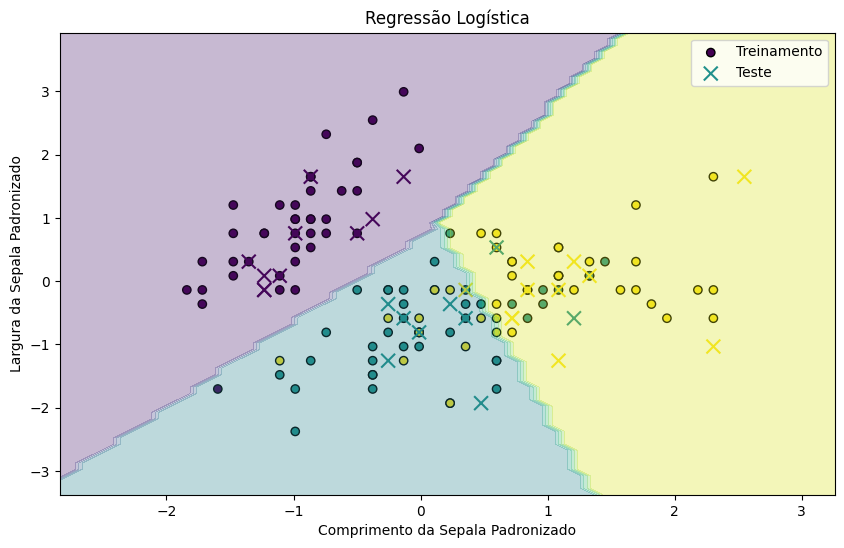

In [61]:
# Passo 7: Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar os pontos de dados de treinamento
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Treinamento')

# Plotar os pontos de dados de teste
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Teste')

# Plotar as regiões de decisão
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Comprimento da Sepala Padronizado')
plt.ylabel('Largura da Sepala Padronizado')
plt.title('Regressão Logística')
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.9735576723414217


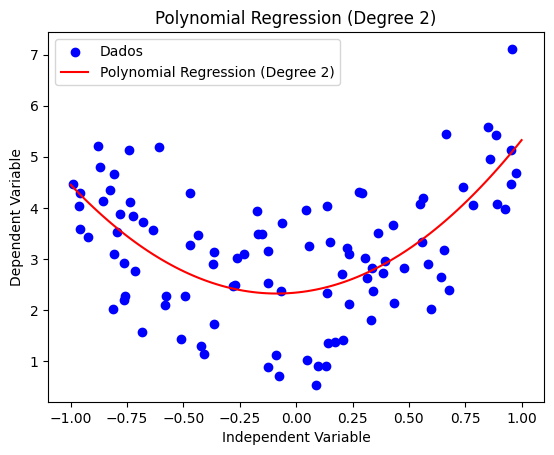

In [63]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
x = 2 * np.random.rand(100, 1) - 1  # Independent variables between -1 and 1
y = 3 * x**2 + 0.5 * x + 2 + np.random.randn(100, 1)  # Quadratic relationship with noise

# Plot the data
plt.scatter(x, y, color='blue', label='Dados')

# Define the polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the data using polynomial features
x_poly = poly_features.fit_transform(x)

# Create a linear regression model
lin_reg = LinearRegression()

# Fit the model to the transformed data
lin_reg.fit(x_poly, y)

# Plot the fitted curve
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
x_plot_poly = poly_features.transform(x_plot)
y_plot = lin_reg.predict(x_plot_poly)
plt.plot(x_plot, y_plot, color='red', label='Polynomial Regression (Degree 2)')

# Evaluate the model performance
y_pred = lin_reg.predict(x_poly)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


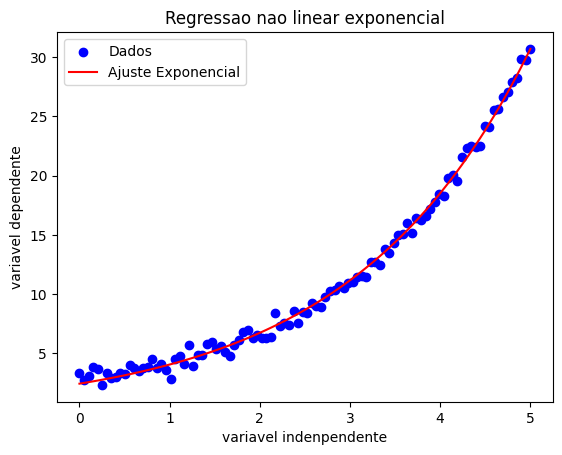

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

#Funcao exeponcial para ajustar aos dados
def modelo_exponencial(x, a, b, c):
    return a * np.exp(b * x)

#gerar dados sinteticos
np.random.seed(0)
x = np.linspace(0, 5, 100) #variavel independente
y = 2.5 * np.exp(0.5 * x) + np.random.normal(0, 0.5, 100) #relacao exponencial com ruido

#ajustar o modelo aos dados usando curve_fit
params, _ = curve_fit(modelo_exponencial, x, y)

#plotar os dados
plt.scatter(x, y, color='blue', label='Dados')

#plotar a curva ajustada
plt.plot(x, modelo_exponencial(x, *params), color='red', label='Ajuste Exponencial')

plt.xlabel('variavel indenpendente')
plt.ylabel('variavel dependente')
plt.title('Regressao nao linear exponencial')
plt.legend()
plt.show()